# Сборный проект 1. Анализ игровой индустрии за 2016 год

## Цели проекта

Провести анализ данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформ.
Выявить закономерности, определяющие коммерческую успешность игры.

### План выполнения работы:


***1. Изучение общей информации о данных***

***2. Предобработка данных***

    2.1 Проверка на дубликаты
    
    2.2 Преобразование типов данных
    
    2.3 Расчёт дополнительных данных
    
***3. Исследовательский анализ данных***

    3.1 Выбор актуальных игровых платформ и периода релиза игр
        
    3.2 Исследование продаж по актуальным платформам
        
    3.3 Влияние отзывов пользователей и критиков на продажи
        
    3.4 Влияние жанра игры на продажи
        
***4. Портрет пользователя каждого региона***

    4.1 - Самые популярные платформы (топ-5) и разница в долях продаж.
    
    4.2 - Самые популярные жанры (топ-5) и разница между жанрами.
    
    4.3 - Влияние рейтинга ESRB на продажи в отдельном регионе.

***5. Проверка гипотез***

        5.1 О равенстве средних пользовательских рейтингов платформ Xbox One и PC
        
        5.2 О равенстве средних пользовательских рейтингов жанров Action и Sports

***6. Общий вывод***

### Описание проекта:

В проекте осуществлен анализ для международного интернет магазина "Стримчик". Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы взяты из открытых источников. Для эффективности рекламных компаний необходимо выявить определяющие успешность игры закономерности.

### Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 1. Изучение общей информации о данных

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# читаем данные из .csv файла с помощью метода read_csv()
try:
    df = pd.read_csv('D:\\python\\project_5\\games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- В исходной таблице df всего 16715 строк.
- Обнаружены пропуски в таблице в колонках оценок критиков, игроков, а таже в рейтинге. 
- Оценим в цифрах общее количество пропусков при помощи функции (ratio_nan) подсчета пропусков в таблице.
- Имеются замечания по типам данных:

    - привести к целочисленному типу int данные в колонке Year_of_Release
    - привести к дробному типу float64 данные в колонке User_Score
    - привести к типу категория category данные в колонке Rating
    - привести в соответствие оценки в колонках критиков и пользователей для возможности сравнения
    - в остальных колонках типы данных на первый взгляд соответствуют столбцам
- Присутствуют стилистические ошибки:

    - сочетание верхних и нижних регистров в наименовании столбцов
    - сочетание верхних и нижних регистров в наименовании жанров Genre 
    - сочетание верхних и нижних регистров в наименовании игр Name (возможно там скрываются дубликаты)

In [4]:
# оценим количество NaN в разных колонках
def ratio_nan(data):
    series_nan =  data.isna().sum().sort_values()
    for column in series_nan.index:
        if series_nan[column]==0:
            continue 
        print('{:<20}| NaN = {:<5}| {:^5.1%}'.format(column,series_nan[column],series_nan[column]/data.shape[0]))
    
print('Распределение пропусков в таблице:')
ratio_nan(df)

Распределение пропусков в таблице:
Name                | NaN = 2    | 0.0% 
Genre               | NaN = 2    | 0.0% 
Year_of_Release     | NaN = 269  | 1.6% 
User_Score          | NaN = 6701 | 40.1%
Rating              | NaN = 6766 | 40.5%
Critic_Score        | NaN = 8578 | 51.3%


- В половине строк в количестве 51,3% пропущены значения оценок критиков. На первый взгляд проблематично заполнить эти данные, поскольку каждая оценка индивидуальна. В целом для анализа данных по выборкам этих данных может быть достаточно.
- По рейтингу и оценкам пользователей примерно одинаковое количество пропусков в количестве 40,5 и 40,1 % соответственно, что наводит на мысли о взаимосвязи величин. Далее проверим существует ли между ними зависимость.
- В годе выпуска игры 1,6 % пропусков, теоретически можно попытаться восстановить данные из открытых источников.
- В колонках игры и жанра всего по два пропуска соответственно, что наводит подозрение на взаимосвязь. 

In [5]:
# посмотрим на строки с пропусками
df[df['Name'].isna()].head()
df[df['Genre'].isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как и предполагалось, пропуски по одним и тем же строкам. При острой необходимости можно попытаться восстановить данные по игры по году релиза и платформе. На данный момент восстановление не представляется статистически значимым ввиду низких продаж. Хотя и отсутствие продаж нам может служить важным индикатором для понимания, какие игры популярны, а какие нет. Заменим имя и жанр на noname и genre соответственно.

### 2. Предобработка данных

#### 2.1 Проверка на дубликаты

In [6]:
# проверка на явные дубликаты
display(df.duplicated().sum())

0

Отлично. Таблица не содержит явных дубликатов. После преобразования типов данных произведем повторную проверку.

#### 2.2 Преобразование типов данных

Приведем к змеиному регистру наименование столбцов.

In [7]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Пропуски в жанре genre и наименовании игры name**

Проверим столбцы genre и name на количество подгрупп жанров и количество игр.

In [8]:
df['genre'].value_counts().head()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Name: genre, dtype: int64

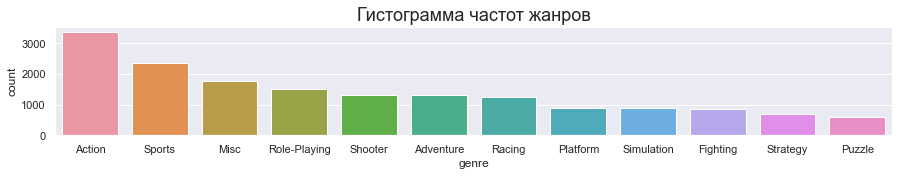

In [9]:
plt.figure(figsize=(15,2))
sns.set()
sns.countplot(x=df['genre'],
              order = df['genre'].value_counts().index)
plt.title('Гистограмма частот жанров', fontsize=18)
plt.show()

Можно смело приводить к змеиному регистру наименование поджанров в столбце genre.

In [10]:
df['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

Слишком много наименований игр, чтобы оценить данные на явные дубликаты. Также слишком много потенциальных возможностей, чтобы допустить ошибку. Некоторые игры повторяются, чего по логике быть не должно. Возможно это перевыпуски популярных игр. Например Most Wanted или Fifa - это явные хиты игровой индустрии.

Для начала исправим найденные замечания по стилистическим ошибкам.

In [11]:
df['genre'] = df['genre'].str.lower()
df['name'] = df['name'].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перепроверим на дубликаты.

In [12]:
display(df.duplicated().sum())

0

Перепроверка не дала результатов. Тем не менее теперь у нас есть в уверенность, что явные дубликаты остутствуют.

Заменим имя и жанр в строках с пропусками на noname и genre соответственно.

In [13]:
df['name'] = df['name'].fillna('noname')
df['genre'] = df['genre'].fillna('genre')

In [14]:
print('Количество оставшихся строк в таблице df:', len(df))
print('Количество игр в таблице df:', len(df['name'].unique()))

Количество оставшихся строк в таблице df: 16715
Количество игр в таблице df: 11560


Нам удалось сохранить все строки в таблице. Но интересно, что количество игр не соответствует количеству строк таблицы. Значит некоторые игры дублируются, что мы ранее уже наблюдали. Посчитаем разницу

In [15]:
print('Количество игр - дубликатов:', len(df) - len(df['name'].unique()))
print('Доля игр - дубликатов: {:.1%}'.format(1- len(df['name'].unique()) / len(df)))

Количество игр - дубликатов: 5155
Доля игр - дубликатов: 30.8%


30 % наименований игр дублируются. Вероятно некоторые игры перевыпускались в разные годы или выпускались на разных платформах.

**Платформа игры - platform**

Доли платформ:


,platform,%
PS2,2161,12.9
DS,2151,12.9
PS3,1331,8.0
Wii,1320,7.9
X360,1262,7.6


Text(0.5, 1.0, 'Доли платформ')

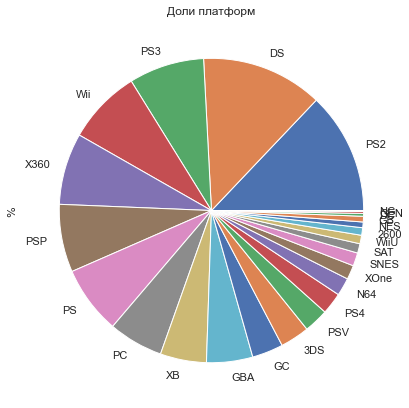

In [16]:
platform_part = df['platform'].value_counts().to_frame() # to_frame() для преобразования series в DataFrame
platform_part.columns = ['platform'] # переименовываем столбец
platform_part['%'] = ((platform_part['platform']/df.shape[0])*100).round(1) # процентное соотношение пользователей

print('Доли платформ:')
display(platform_part.head())

platform_part['%'].plot.pie(figsize=(7, 7));
plt.title('Доли платформ')

Похоже, что с наименованиями платформ все в порядке. Лидеры рынка соответствуют действительности.

**Год релиза игры - year_of_release**

Заполним пропущенные значения в году значением года 1975, поскольку реальных игр в этом году не выходило и поменяем тип данных на целочисленный.

In [17]:
df['year_of_release'] = df['year_of_release'].fillna(1975)
df['year_of_release'] = df['year_of_release'].astype('int')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<AxesSubplot:>

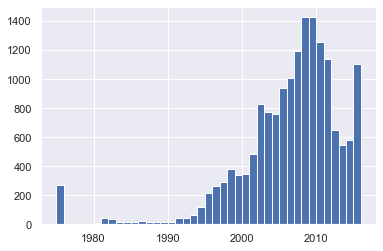

In [18]:
df['year_of_release'].hist(bins=41)

Большинство игр производилось после 1990 года. Можно сказать что расцвет игровой индустрии проявился в 90-е годы. Особняком стоит производство игр в 1975 г, как мы помним пропуски в эту дату мы самостоятельно перенесли, чтобы не потерять остальные данные.

**Оценки пользователей - user_score и критиков сritic_score**

In [19]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Подозрительное значени tbd ознает "To be determined". Перевод - "будет определено" (в смысле "будет определено позже").

In [20]:
df[df['user_score'] == 'tbd'].count()

name               2424
platform           2424
year_of_release    2424
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

In [21]:
2424/df.shape[0]

0.1450194436135208

14% таблицы df в оценках пользователей заполнено значением 'tbd'. 

По сути tbd напоминает по своим свойствам NaN и включает в себя менее 4х оценок пользователей, а этого недостаточно для формирования оценки. Заменим это значение на NaN, поскольку в данный момент мы не можем работать с 'tbd' значением.

In [22]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [23]:
df['critic_score'] = df['critic_score'] / 10

In [24]:
df[df['user_score'].isna()].count()

name               9125
platform           9125
year_of_release    9125
genre              9125
na_sales           9125
eu_sales           9125
jp_sales           9125
other_sales        9125
critic_score       1120
user_score            0
rating             2445
dtype: int64

Наглядно посмотрим и посчитаем насколько в среднем совпадают оценки критиков и обычных пользователей.

In [25]:
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для user_score
for column in df[['user_score']]:    
    print('Среднее {}: {:.2f}'.format(column,df[column].mean()))
    print('Медиана {}: {:.2f}'.format(column,df[column].median()))
    print('Дисперсия {}: {:.2f}'.format(column,np.var(df[column])))
    print('Среднее отклонение {}: {:.2f} \n'.format(column, np.std(df[column])))
    
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для critic_score
for column in df[['critic_score']]:    
    print('Среднее {}: {:.2f}'.format(column,df[column].mean()))
    print('Медиана {}: {:.2f}'.format(column,df[column].median()))
    print('Дисперсия {}: {:.2f}'.format(column,np.var(df[column])))
    print('Среднее отклонение {}: {:.2f} \n'.format(column, np.std(df[column])))

Среднее user_score: 7.13
Медиана user_score: 7.50
Дисперсия user_score: 2.25
Среднее отклонение user_score: 1.50 

Среднее critic_score: 6.90
Медиана critic_score: 7.10
Дисперсия critic_score: 1.94
Среднее отклонение critic_score: 1.39 



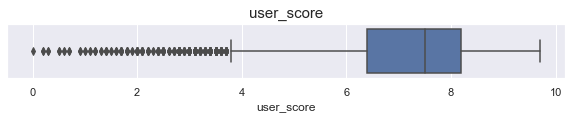

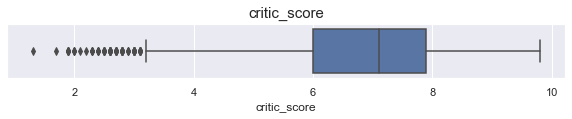

In [26]:
for column in df[['user_score']]:
    plt.figure(figsize=(10,1))
    plt.title(column, fontsize=15)
    sns.boxplot(data=df, x=column)
for column in df[['critic_score']]:
    plt.figure(figsize=(10,1))
    plt.title(column, fontsize=15)
    sns.boxplot(data=df, x=column)

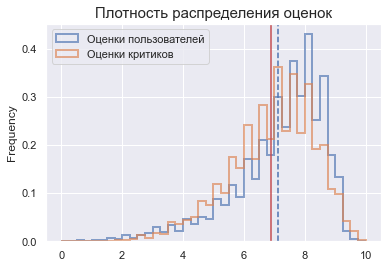

In [27]:
ax = df.plot(kind = 'hist',
                          y = 'user_score',
                          histtype = 'step',       # тип для сравнения двух гистограмм
                          bins = 40,
                          range = (0, 10),
                          alpha = 0.65,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # выводим плотность распределения данных
                          legend = True,           # выводим пояснение для графиков
                          label = 'Оценки пользователей'  # строка подписи для графиков
                         )
df.plot(kind = 'hist',
                            y = 'critic_score',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 40,
                            range = (0, 10),
                            alpha = 0.65,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Оценки критиков'
                           )
ax.set_title('Плотность распределения оценок', fontsize=15)
plt.axvline(np.mean(df['user_score']),color='b', linestyle='--', label='user_score среднее')
plt.axvline(np.mean(df['critic_score']),color='r', linestyle='-', label='critic_score среднее')
plt.show()

Обычные пользователи в среднем чуть более благосклонны в своих оценках игр, чем критики, но принципиальных различий на первый взгляд не наблюдается.

**Рейтинг - rating**

In [28]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

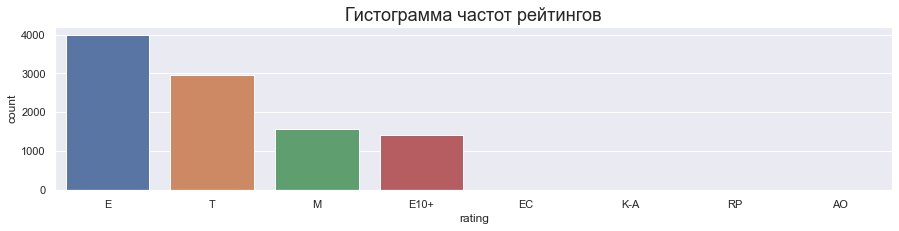

In [29]:
plt.figure(figsize=(15,3))
sns.set()
sns.countplot(x=df['rating'],
              order = df['rating'].value_counts().index)
plt.title('Гистограмма частот рейтингов', fontsize=18)
plt.show()

Рейтинги проставлены согласно ESRB (Entertainment Software Rating Board).  ESRB - это негосударственная организация, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Итак, игры в нашей таблице имеют следующие возрастные рейтинги:

- **E (Everyone)** - для всех возрастов
- **T (Teen)** - для подростков (13-19 лет)
- **M (Mature)** - для всех старше 17 лет
- **E10+ (Everyone 10+)** - для всех, кроме самых маленьких (не младше 10 лет)

Малочисленные категории:

- **EC (Early childhood)** - для детей младшего возраста (от 3 лет)
- **K-A (Kids to adults)** - устаревшая категория (была заменена на Everyone в 1998 году)
- **AO (Adults only 18+)** - только для взрослых (старше 18 лет)
- **RP (Rating pending)** - рейтинг ожидается (для демо-версий и самых новых игр)

Заменим рейтинги в малочисленных категориях на ближайшие по смыслу.

In [30]:
df.loc[(df['rating'] == 'K-A'), 'rating'] = 'E'
df.loc[(df['rating'] == 'EC'), 'rating'] = 'E10+'
df.loc[(df['rating'] == 'AO'), 'rating'] = 'M'
df.loc[(df['rating'] == 'RP'), 'rating'] = np.nan

Поменяем тип данных на соответствующий и вновь посчитаем рейтинги.

In [31]:
df['rating'] = df['rating'].astype('category')
df['rating'].value_counts()

E       3993
T       2961
M       1564
E10+    1428
Name: rating, dtype: int64

In [32]:
df['rating'].unique()

['E', NaN, 'M', 'T', 'E10+']
Categories (4, object): ['E', 'E10+', 'M', 'T']

Удалось оптимизировать категории рейтингов. Осталось разобраться с пропусками в данных.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16715 non-null  int32   
 3   genre            16715 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9946 non-null   category
dtypes: category(1), float64(6), int32(1), object(3)
memory usage: 1.2+ MB


Пропуски в категориях рейтингов не взаимосвязаны с другими данными напрямую, поскольку рейтинги проставляет отдельная организация - ESRB (Entertainment Software Rating Board). Соответственно на данном этапе мы не можем восполнить неполные данные. Оставим оставшиеся рейтинги без изменений, чтобы не вносить искажения в данные.

#### 2.3 Расчёт дополнительных данных

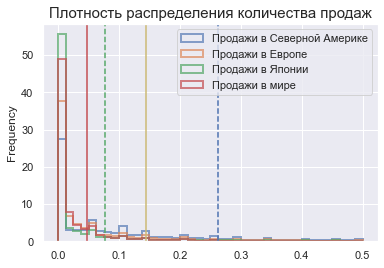

In [34]:
ax = df.plot(kind = 'hist',
                          y = 'na_sales',
                          histtype = 'step',       # тип для сравнения двух гистограмм
                          bins = 40,
                          range = (0, 0.5),
                          alpha = 0.65,
                          linewidth = 2,           # ширина графика
                          grid = True,
                          density = True,          # выводим плотность распределения данных
                          legend = True,           # выводим пояснение для графиков
                          label = 'Продажи в Северной Америке'  # строка подписи для графиков
                         )
df.plot(kind = 'hist',
                            y = 'eu_sales',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 40,
                            range = (0, 0.5),
                            alpha = 0.65,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Продажи в Европе'
                           )
df.plot(kind = 'hist',
                            y = 'jp_sales',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 40,
                            range = (0, 0.5),
                            alpha = 0.7,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Продажи в Японии'
                           )
df.plot(kind = 'hist',
                            y = 'other_sales',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 40,
                            range = (0, 0.5),
                            alpha = 0.7,
                            linewidth = 2,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Продажи в мире'
                           )

ax.set_title('Плотность распределения количества продаж', fontsize=15)
plt.axvline(np.mean(df['na_sales']),color='b', linestyle='--', label='na_sales среднее')
plt.axvline(np.mean(df['eu_sales']),color='y', linestyle='-', label='eu_sales среднее')
plt.axvline(np.mean(df['jp_sales']),color='g', linestyle='--', label='jp_sales среднее')
plt.axvline(np.mean(df['other_sales']),color='r', linestyle='-', label='other_sales среднее')
plt.show()

Лидер по продажам игр Северная Америка, далее по убыванию следуют Европа, Япония и остальной мир. Можно вычистить данные от нулевых значений, но в целом у нас не стоит такой цели, мы просто ознакомились с данными. В исследовательском анализе данные будут рассмотрены подробнее.

**Общее количество продаж игр - sum_sales**

Рассчитаем и создадим дополнительный столбец с суммарными продажами игр  **sum_sales**.

In [35]:
df['sum_sales'] = df['eu_sales'] + df['na_sales'] + df['jp_sales'] + df['other_sales']

df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,5.8,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,8.7,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Столбец со значением суммарных продаж sum_sales успешно добавлен в таблицу.

Оценим после предобработки данных вновь доли пропусков в таблице.

In [36]:
ratio_nan(df)

rating              | NaN = 6769 | 40.5%
critic_score        | NaN = 8578 | 51.3%
user_score          | NaN = 9125 | 54.6%


### Вывод

- Исправлена стилистическая ошибка в наименовании столбцов - данные приведены к нижнему регистру.

- Типы данных приведены в соответствие с информационным наполнением, а именно:

        - приведены к целочисленному типу int данные в колонке year_of_release
        - приведены к дробному типу float64 данные в колонке user_score
        - приведены к типу category данные в колонке rating
        - приведены в соответствие оценки в колонках критиков и пользователей для возможности сравнения

- Малочисленные категории в  rating / рейтингах  (до 8 игр) переведены в наиболее соответствующие по смыслу многочисленные категории рейтингов. Количество категорий рейтингов сократилось с 8 до 4х категорий численностью от 2х до 4х тысяч игр.

- Исследованы и обработаны пропуски:

        - в колонке year_of_release пропуски заменены 1975 годом релиза для возможности преобразования типа данных в целочисленный.
        - пропуски в колонках name и genre (по 2 пропуска) заполнены соответственно  noname и genre
        - произведена замена значений малочисленной категории RP на NaN в столбце рейтинга rating
        - определены доли пропусков в остальных столбцах user_score, rating, critic_score
        - произведена замена значений tbd на NaN в столбце оценок пользователей user_score. Соответственно увеличилась доля пропусков NaN c 40.1% до 54.6%.
        - пропуски в столбцах rating и critic_score оставлены без изменения
        - потенциальная причина возникновения пропусков - это отсутствие реальных данных, поскольку некоторые непопулярные или провальные игры могли быть не удостоены внимания ни критиков, ни пользователей. Также возможны пропуски в данных по причине того, что рейтинги были введены не так давно - в шапке таблицы прослеживается отсутствие данных по столбцам оценок в даты до 2000х годов.
    
- Рассчитан и добавлен в таблицу df столбец со значением суммарных продаж sum_sales.


### 3. Исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?** 2008-2016


**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

**Не учитывайте в работе данные за предыдущие годы.**

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

**Соотнесите выводы с продажами игр на других платформах.**

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### 3.1 Выбор актуальных игровых платформ и периода релиза игр

Определим выбросы в периодах выпуска игр для исключения искажений в дальнейшем анализе.

<AxesSubplot:>

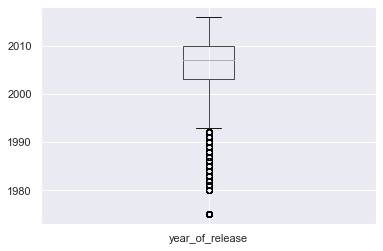

In [37]:
df.boxplot('year_of_release')

Общее количество выпущенных игр:
16715


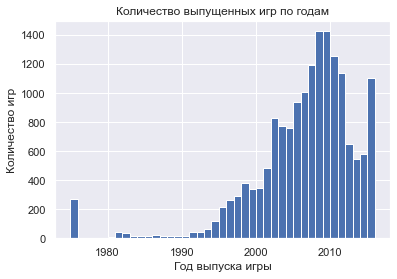

In [38]:
df['year_of_release'].hist(bins=41)
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска игры')
;
print('Общее количество выпущенных игр:')
print(df['name'].count())

В таблице pivot_games_year сохраним точные цифры выпуска игр по годам.

Для дальнейшего исследования построим график продаж игр на различных платформах.

''

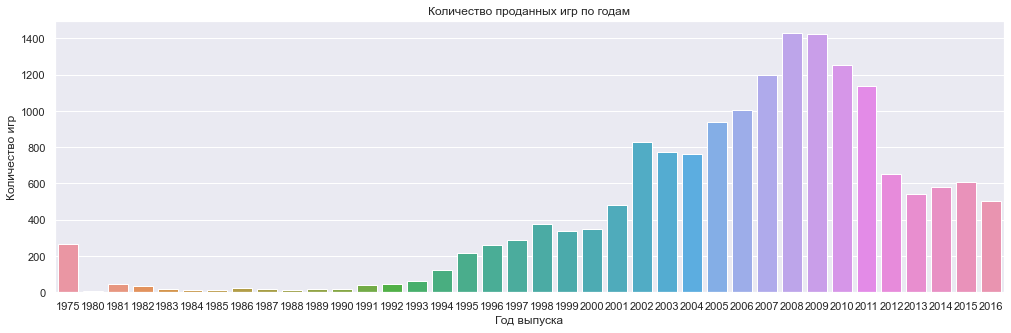

In [39]:
pivot_games_year = df.pivot_table(index='year_of_release',
                                 values='sum_sales', 
                                 aggfunc='count')

pivot_games_year.columns = ['games_count']

plt.figure(figsize=(17,5))
sns.barplot(x=pivot_games_year.index,y=pivot_games_year['games_count'])
plt.title("Количество проданных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
;

Продажи игр до 1993 г. можно считать выбросами, поскольку в эти годы было действительно мало выпущено игр, которые к тому же уже потеряли свою актуальность в связи с развитием технологий и по прошествии лет. Также помним, что продажи в 1975 году это строки с пропущенными датами, которые мы сохранили для целостности данных.

Начиная с 90х годов прошлого века рынок в целом только стремительно возрастал. Например в период с 2000 до 2010 количество выпущенных игр смогло увеличиться в 4 раза с 350 до 1426 игр. Для сравнения в период с 1990 до 2000 рынок по количеству выпущенных игр вырос в 20 раз с 16 до 350 игр, тогда как в 80-е предпосылок для роста не наблюдалось.

Явный пик по выпущенным играм наблюдается в районе 2008-2009 годов, далее неуклонное падение вплоть до 2016 года, где наблюдается резкий скачек, что может означать появление нового интереса к играм. 

Для нашего исследования важны данные за последние 6 - 10 лет, а также важно понимать причины перелома в районе 2009 года и причины роста выпуска игр в 2016 для правильной оценки.

В 2008-09 этой причиной мог быть кризис, который коснулся развитые страны и развитие мобильных технологий и мобильных игр соответственно. В 2016 возможно развитие новых технологий с улучшенным качеством игр. 

Не смотря на всплеск количества выпущенных игр в 2016 объем продаж все равно стремится вниз и находится на уровне начала нулевых.

Text(0.5, 1.0, 'Доли рынка по количеству выпущенных игр среди платформ')

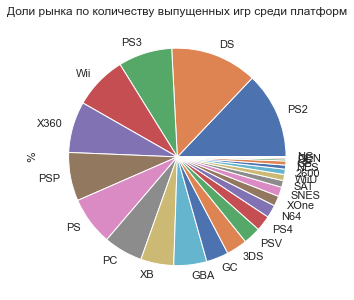

In [40]:
platform_part['%'].plot.pie(figsize=(5, 5));
plt.title('Доли рынка по количеству выпущенных игр среди платформ')

In [41]:
# посчитаем суммарный объем рынка продаж, млн проданных копий
pivot_sales_platform = df.pivot_table(index='platform',
                                 values='sum_sales', 
                                 aggfunc='sum').sort_values(by='sum_sales',
                                                            ascending=False)
pivot_sales_platform['%sales'] = ((pivot_sales_platform['sum_sales']/ (pivot_sales_platform['sum_sales'].sum()))*100).round(1)

print('Суммарный объем рынка продаж, млн проданных копий:')
print(pivot_sales_platform['sum_sales'].sum().round(2))
print()
print('Суммарное количество продаж по платформам, млн проданных копий:')
pivot_sales_platform.T


Суммарный объем рынка продаж, млн проданных копий:
8915.71

Суммарное количество продаж по платформам, млн проданных копий:


platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC,...,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
sum_sales,1255.77,971.42,939.65,907.51,806.12,730.86,317.85,314.14,294.05,259.52,...,33.59,30.77,15.95,1.86,1.44,1.42,0.16,0.1,0.04,0.03
%sales,14.10,10.90,10.50,10.20,9.00,8.20,3.60,3.50,3.30,2.90,...,0.40,0.30,0.20,0.00,0.00,0.00,0.00,0.0,0.00,0.00


Можем сравнить доли продаж по платформам с долями выпущенных игр по рынку. Ранее сохраняли доли платформ в таблице platform_part.

In [42]:
print('Доли рынка по количеству выпущенных игр среди платформ:') 
platform_part.T

Доли рынка по количеству выпущенных игр среди платформ:


,PS2,DS,PS3,Wii,X360,PSP,PS,PC,XB,GBA,...,GB,DC,GEN,NG,SCD,WS,3DO,TG16,GG,PCFX
platform,2161.0,2151.0,1331.0,1320.0,1262.0,1209.0,1197.0,974.0,824.0,822.0,...,98.0,52.0,29.0,12.0,6.0,6.0,3.0,2.0,1.0,1.0
%,12.9,12.9,8.0,7.9,7.6,7.2,7.2,5.8,4.9,4.9,...,0.6,0.3,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
pivot_games_year.tail(20).T

year_of_release,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
games_count,289,379,338,350,482,829,775,762,939,1006,1197,1427,1426,1255,1136,653,544,581,606,502


''

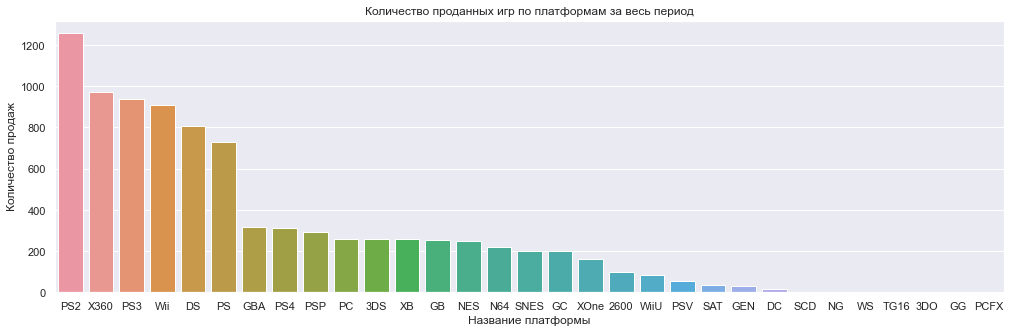

In [44]:
plt.figure(figsize=(17,5))
sns.barplot(x=pivot_sales_platform.index,y=pivot_sales_platform['sum_sales'])
plt.title("Количество проданных игр по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
;

Судя по графику самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

Платформа PS2 все так же лидирует в списке, но это совсем не значит, что прибыль компании зависит только от доли выпущенных игр на рынке. 

Рассмотрим на примере X360. Платформа X360 занимает 10.9% продаж по рынку в целом и находится на втором месте среди лидеров продаж, но занимает шестое место по выпуску игр в списке всех платформ с показателем 7.6% от общего количества выпущенных игр. Это может значить, что платформа сравнительно новая и качественная, если находится в лидерах рынка по продажам несмотря на меньшую долю выпущенных игр.

А продукция DS наоборот(в сравнении с X360) лидер по долям выпущенных игр, но находится на 6 месте по продажам. Без дополнительного изучения информации можем предположить, что DS это старая или устаревающая платформа. Ведь мы видели уже графики продаж в зависимости от годов и наблюдали явную разницу между 90-ми годами и нулевыми. Далее проверим это предположение по платформе.

Тем не менее сильная взаимосвязь между выпущенными игрыми и платформами наблюдается. И в этом присутствует простая логика - если игру выпускают, то ее кто нибудь рано или поздно купит.

Как итог можно сказать, что для дальнейшего изучения нас в первую очередь интересует период за последние 8 лет до 2016 года и 6 самых популярных платформ PS2, X360, PS3, WII, DS, PS.

In [45]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 1980 года
def sales_platforms_for_year(name, data):
    return data[(data['platform']==name) & (data['year_of_release']>1980)].pivot_table(
        index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

In [46]:
# сохраним в таблице общие продажи по платформам, отсортируем по убыванию и оставим только топ 6 и топ 20.
top_6_platforms = pivot_sales_platform.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False).head(6)

top_20_platforms = pivot_sales_platform.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False).head(20)

top_6_platforms = top_6_platforms.reset_index()
top_20_platforms = top_20_platforms.reset_index()
top_20_platforms.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC,3DS,XB,GB,NES,N64,SNES,GC,XOne,2600,WiiU
sum_sales,1255.77,971.42,939.65,907.51,806.12,730.86,317.85,314.14,294.05,259.52,259.0,257.74,255.46,251.05,218.68,200.04,198.93,159.32,96.98,82.19


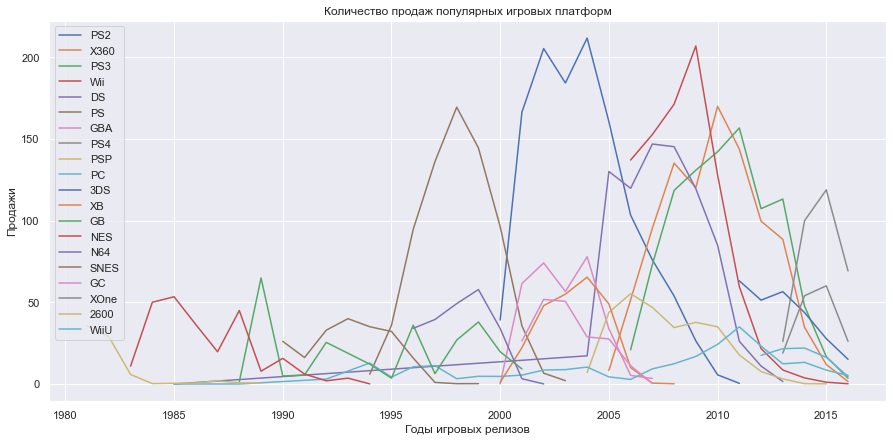

In [47]:
# Оценим продажи 20 самых популярных платформ во временных периодах
plt.figure(figsize=(15,7))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_20_platforms['platform']):
    sns.lineplot(data=sales_platforms_for_year(i,df)['sum_sales'], label=i)
    plt.legend()

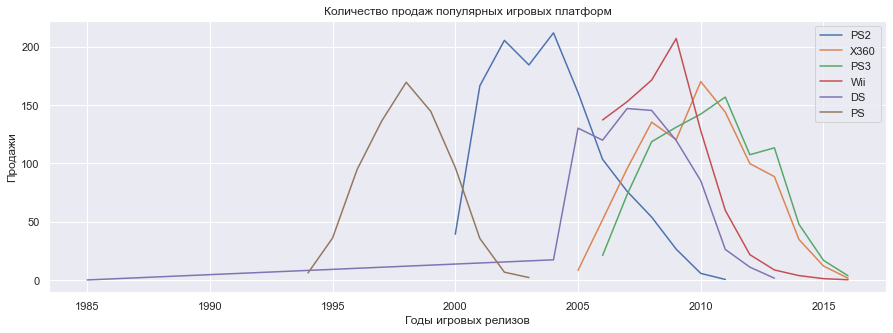

In [48]:
# Оценим продажи 6 самых популярных платформ во временных периодах с 1985
plt.figure(figsize=(15,5))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_6_platforms['platform']):
    sns.lineplot(data=sales_platforms_for_year(i,df)['sum_sales'], label=i)
    plt.legend()

- Период популярности игровых платформ длится от 5 до 10 лет.
- Продажи PS лидируют в промежутке от 1995 до 2005. Этот период и платформа уже не актуальны.
- Продажи PS2 лидируют в промежутке от 2000 до 2006. Аналогично неактуальные период и платформа
- В условном промежутке от 2005 до 2010 за лидерство на рынке конкурируют DS, Wii, X360, PS3. Это объясняет пик продаж в это время.
- Интересное наблюдение, что DS - это долгожитель. Платформа существовала с 1985 до 2013 с мощным ростом популярности в 2005-2010.
- В период с 2010 по 2016 все оставшиеся платформы стремительно теряют популярность, но относительно неплохо на фоне остальных выглядят PS3 и X360, которые к 2016 остаются лидерами
- В 2015 единственная игровая платформа которая набирает популярность - PS4. Самые преданные фанаты игровой индустрии по всей видимости предпочитают эту приставку в 2015. Спад в 2016 предположительно может быть объяснен неполнотой данных за 2016 год. 
- На основании изученных данных PS4 на данном этапе исследования выглядит наиболее перспективной игровой платформой.
- Как мы видим судя по убыванию популярности всех платформ нельзя делать прогноз по угасающим в продажах платформам. Следовательно искать остальные перспективные платформы(ps4 уже выявлена) следует в период спада популярности старых платформ. Этот период находится между 2010 и 2016 годами, но допустимо рассмотреть период с 2012 до 2016. На основании среза данных по периоду мы сможем составить прогноз.
- Далее составим срез данных по годам 2012-2016 для анализа актуальных платформ и сохраним в таблице df_actual.

#### 3.2 Исследование продаж по актуальным платформам

Сохраним в таблице df_actual данные за интересующий нас актуальный период с 2012 по 2016 включительно.

In [49]:
df_actual = df.query('2012 <= year_of_release <= 2016')
print('Количество строк в таблице df_actual c актуальными данными по играм за 2012-2016 гг.:', df_actual.shape[0])


Количество строк в таблице df_actual c актуальными данными по играм за 2012-2016 гг.: 2886


Сохраняем сводную таблицу продаж игр для 7 самых продающих платформ в периода 2012-2016:

In [50]:
top_7_platforms_actual = df_actual.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False).head(7)

top_7_platforms_actual = top_7_platforms_actual.reset_index()

top_7_platforms_actual.T

,0,1,2,3,4,5,6
platform,PS4,PS3,X360,3DS,XOne,WiiU,PC
sum_sales,314.14,288.79,236.54,194.61,159.32,82.19,62.65


In [51]:
def sales_platforms_actual(name, data):
    return data[(data['platform']==name) & (data['year_of_release']>2012)].pivot_table(
        index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

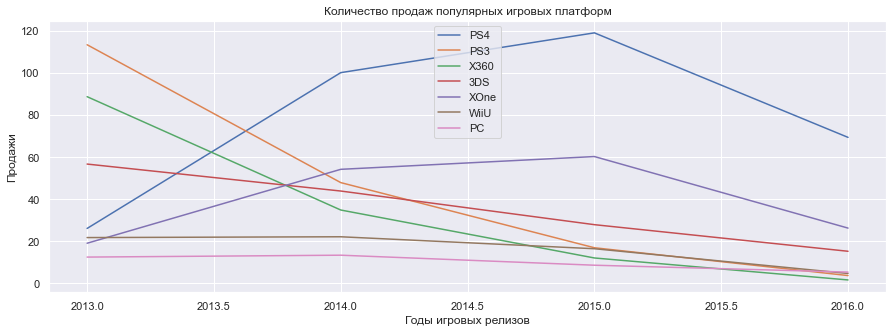

In [52]:
# Оценим продажи 6 самых популярных платформ во временных периодах с 2012-2016
plt.figure(figsize=(15,5))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_7_platforms_actual['platform']):
    sns.lineplot(data=sales_platforms_actual(i,df)['sum_sales'], label=i)
    plt.legend()

- XOne и PS4 это потенциально самые прибыльные платформы на 2017 год, несмотря на то, что к концу 2016 продажи платформ начинают снижаться. Ранее предполагалось, что снижение происходит за счет неполных данных за 2016 год.
- остальные платформы хотя и лидируют в цифрах за указанный период, но не могут конкурировать с играми на XOne и PS4 в будущем, поскольку продажи их неуклонно падают и период жизни этих платформ подходит к концу.
- в целом судя по графикам создается впечатление, что период расцвета игр на различных платформах завершен и массовое будущее за мобильными играми и платформами, которые постепенно уводят покупателей на свой рынок. Но это уже тема для другого исследования. 
- Важный факт, что продажи на PC стабильно держатся на потяжении долгих лет примерно на одном уровне. Это значит, что есть определенная база людей, фанатов игр, которые создают эту площадку и живут внутри особого сообщества любителей компьютерных игр и вне зависимости от трендов продолжат обеспечивать стабильное потребление контента, выпускаемого для PC.
- В целом можно сказать, что перспектив для роста рынка на момент 2016-2017 годов не предвидится, тем не менее важно упомянуть, что вряд ли производители игр теряют сильно в своих доходах, поскольку важно не забывать о онлайн играх, которые собирают большие базы фанатов, а также о формировании такого явления, как социальные сети, комьюнити внутри игр, стриминг и прочие атрибуты индустрии. Ведь если мы наблюдали такое количество пользователей и покупателей в 2008 году, то вряд ли пользователи просто так исчезли. Они просто перетекли в другую корзину. Не просто так существуют целые корпорации, заинтересованные в удержании внимания пользователей. Поэтому платформы просто могли сменить стратегию развития, которая не отображается на данных, которыми мы располагаем.

Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.

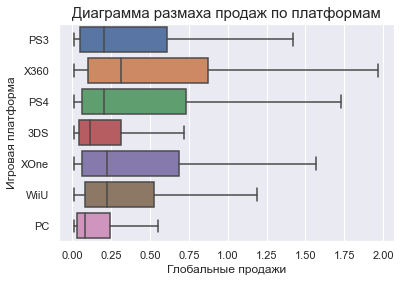

In [53]:
sns.boxplot(y='platform', x='sum_sales', showfliers=False, orient='h', data=df_actual.
            query('"PS4" in platform or "XOne" in platform or "3DS" in platform or "X360" in platform or "PC" in platform or "WiiU" in platform or "PS3" in platform'))
plt.title('Диаграмма размаха продаж по платформам', fontsize=15)

plt.xlabel('Глобальные продажи', fontsize=12)
plt.ylabel('Игровая платформа', fontsize=12)
plt.show()

Посчитаем среднее, медиану, дисперсию и среднее отклонение для 7 актуальных платформ:

In [54]:
top_7 = df.query('"PS4" in platform or "XOne" in platform or "3DS" in platform or "X360" in platform or "PC" in platform or "WiiU" in platform or "PS3" in platform')
top_7.pivot_table(index = 'platform', values = 'sum_sales', 
                        aggfunc = ['mean', 'median', 'var', 'std']).style.format('{:.2f}')

,mean,median,var,std
,sum_sales,sum_sales,sum_sales,sum_sales
platform,,,,
3DS,0.50,0.12,2.05,1.43
PC,0.27,0.05,0.46,0.68
PS3,0.71,0.27,1.94,1.39
PS4,0.80,0.20,2.59,1.61
WiiU,0.56,0.22,1.12,1.06
X360,0.77,0.28,2.61,1.62
XOne,0.65,0.22,1.07,1.04


- Лидеры продаж по медиане это платформы  X360 с количеством 0,28 млн копий и PS3 с количеством 0,27 млн копий
- Медианы платформ  XOne, PS4, WiiU находятся в диапазоне 0,2 - 0,22 млн проданных копий.
- Медианы всех распределений в 2 - 5 раз меньше среднего. 
- Значения распределения глобальных продаж по всем платформам сильно скошены вправо и имеют длинный хвост.
- Продажи на PC самые низкие из выборки. Возможно по той причине, что на PC можно скачать все игры бесплатно.
- Значение дисперсии превышает среднее в 2- 4 раза и медиану в 5 - 10 раз. Это значит что у нас довольно большой разброс данных.




#### 3.3 Влияние отзывов пользователей и критиков на продажи

Посмотрим, какое влияние оказывают отзывы критиков и пользователей на продажи игр:

In [55]:
ps4 = df.query('"PS4" in platform')
xone = df.query('"XOne" in platform')
ps3 = df.query('"PS3" in platform')
x360 = df.query('"X360" in platform')
wiiu = df.query('"WiiU" in platform')

In [56]:
def corr(data):
    sns.pairplot(data[['user_score', 'critic_score', 'sum_sales']])
    plt.figure(figsize=(4,4))
    # визуализируем матрицу корреляции с помощью heatmap библиотеки seaborn
    sns.heatmap(data[['sum_sales', 'critic_score', 'user_score']].corr(), annot=True) 
    plt.show()

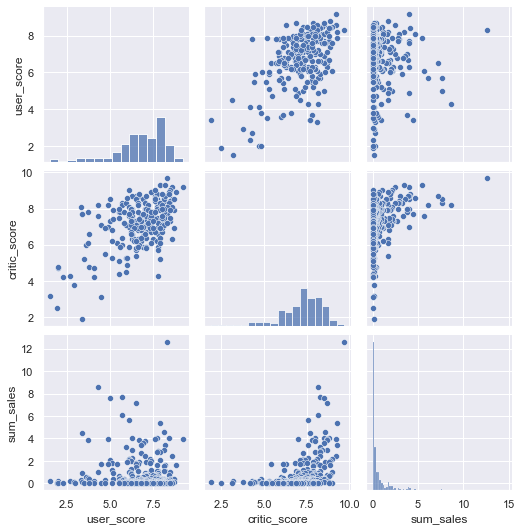

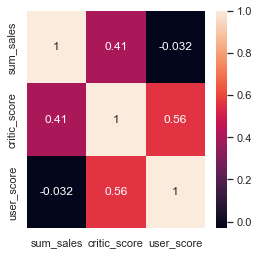

In [57]:
corr(ps4)

- Для PS4 зависимость между отзывами критиков и количеством продаж умеренная. 
- Коэффициент корреляции между отзывами критиков и количеством продаж равен 0.41
- Для PS4 зависимость между отзывами пользователей и количеством продаж низкая. 
- Также существует высокое влияние отзывов критиков на оценки пользователей.

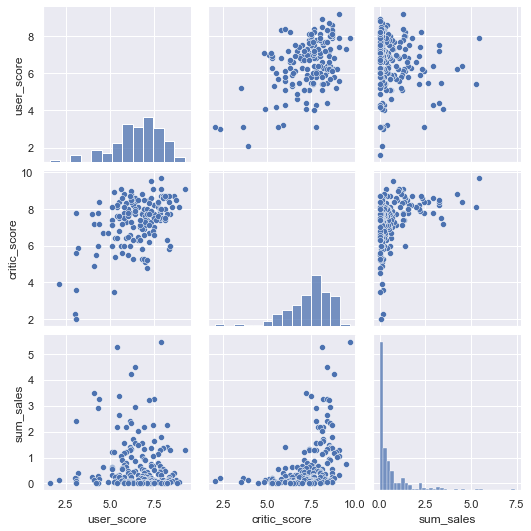

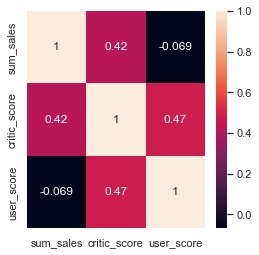

In [58]:
corr(xone)

- Для Xone зависимость между отзывами критиков и количеством продаж умеренная. 
- Коэффициент корреляции между отзывами критиков и количеством продаж равен 0.42
- Для Xone зависимость между отзывами пользователей и количеством продаж низкая, отрицательная
- Присутствует много выбросов
- Также существует умеренное влияние отзывов критиков на оценки пользователей.

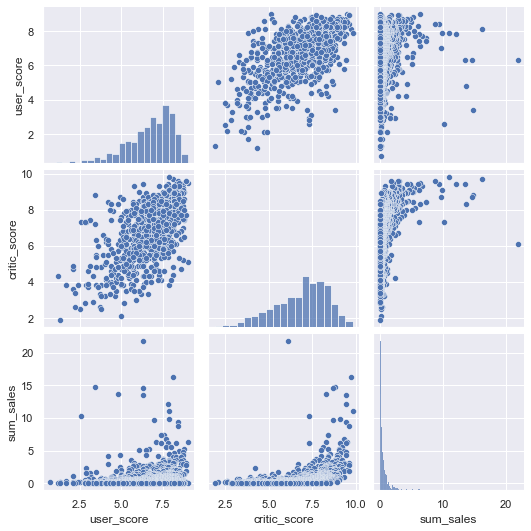

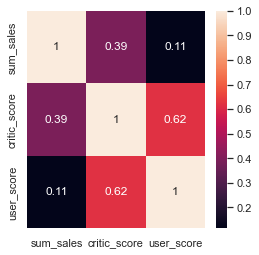

In [59]:
corr(x360)

- Для x360 зависимость между отзывами критиков и количеством продаж умеренная. 
- Коэффициент корреляции между отзывами критиков и количеством продаж равен 0.39
- Для x360 зависимость между отзывами пользователей и количеством продаж слабая
- Присутствует много выбросов
- Также существует высокое влияние отзывов критиков на оценки пользователей.

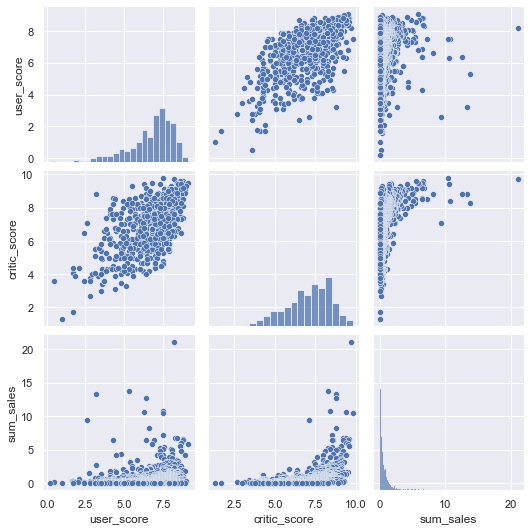

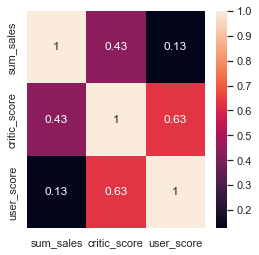

In [60]:
corr(ps3)

- Для ps3 зависимость между отзывами критиков и количеством продаж умеренная. 
- Коэффициент корреляции между отзывами критиков и количеством продаж равен 0.43
- Для ps3 зависимость между отзывами пользователей и количеством продаж слабая
- Присутствует много выбросов
- Также существует высокое влияние отзывов критиков на оценки пользователей.

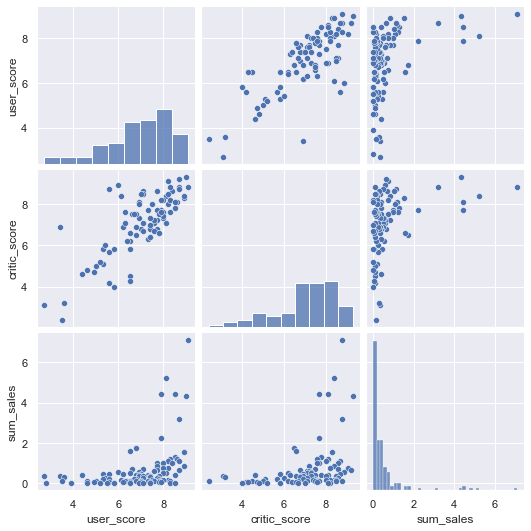

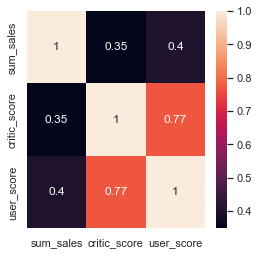

In [61]:
corr(wiiu)

- Для wiiu зависимость между отзывами критиков и количеством продаж умеренная. 
- Коэффициент корреляции между отзывами критиков и количеством продаж равен 0.35
- Для wiiu зависимость между отзывами пользователей и количеством продаж умеренная
- Коэффициент корреляции между отзывами пользователей и количеством продаж равен 0.4
- Присутствует много выбросов
- Также существует весьма высокое влияние отзывов критиков на оценки пользователей.

Как вывод можно сформулировать, что в среднем:
- Для рассматриваемых наиболее продающих  актуальных в период на 2012-2016г. платформ (ps4, xone, ps3, x360, wiiu) зависимость между отзывами критиков и количеством продаж умеренная.
- Коэффициент корреляции между отзывами критиков и количеством продаж равен в среднем 0.4
- Для рассматриваемых платформ зависимость между отзывами пользователей и количеством продаж слабая
- Присутствует много выбросов в данных
- Также существует высокое влияние отзывов критиков на оценки пользователей.
- Отзывы критиков задают оказывают большее влияние на продажи, чем отзывы пользователей.

#### 3.4 Влияние жанра игры на продажи

In [62]:
pivot_genre = df.pivot_table(
    index='genre', values='sum_sales', aggfunc=['sum', 'count']).sort_values(by=(  'sum', 'sum_sales'), ascending=False)

pivot_genre.columns = ['sum_sales', 'games_count']

pivot_genre['ratio_sales_by_games'] = (pivot_genre['sum_sales']/pivot_genre['games_count']).round(2)

pivot_genre

,sum_sales,games_count,ratio_sales_by_games
genre,,,
action,1744.17,3369,0.52
sports,1331.27,2348,0.57
shooter,1052.45,1323,0.80
role-playing,934.56,1498,0.62
platform,827.77,888,0.93
misc,802.51,1750,0.46
racing,728.67,1249,0.58
fighting,447.53,849,0.53
simulation,389.97,873,0.45


In [63]:
pivot_genre['ratio_sales_by_games'].mean()

0.5792307692307692

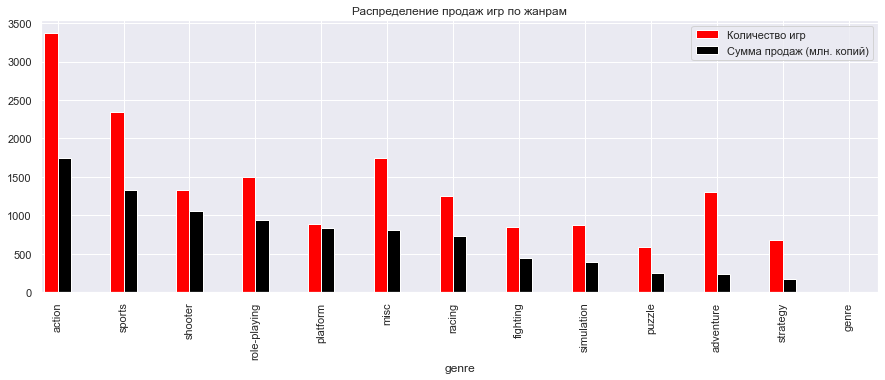

In [64]:
ax=plt.gca()
pivot_genre.plot(y='games_count', kind='bar', ax=ax, position=1, color='red', figsize=(15,5), width=0.2)
pivot_genre.plot(y='sum_sales', kind='bar', ax=ax, position=0, color='black', figsize=(15,5), width=0.2)
ax.legend(['Количество игр', 'Сумма продаж (млн. копий)'])
plt.title('Распределение продаж игр по жанрам')

plt.show()

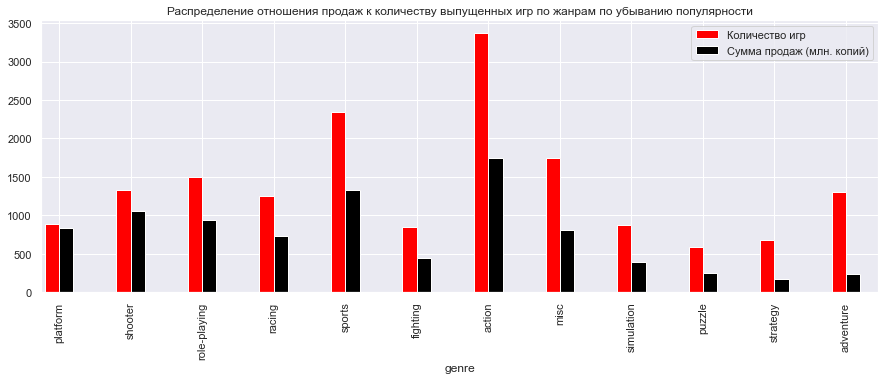

In [65]:
# отсортируем по соотношению продаж количества игр по жанрам
sorted_pivot_genre = pivot_genre.sort_values(by='ratio_sales_by_games', ascending=False)
sorted_pivot_genre = sorted_pivot_genre.query('genre != "genre"')
ax=plt.gca()
sorted_pivot_genre.plot(y='games_count', kind='bar', ax=ax, position=1, color='red', figsize=(15,5), width=0.2)
sorted_pivot_genre.plot(y='sum_sales', kind='bar', ax=ax, position=0, color='black', figsize=(15,5), width=0.2)
ax.legend(['Количество игр', 'Сумма продаж (млн. копий)'])
plt.title('Распределение отношения продаж к количеству выпущенных игр по жанрам по убыванию популярности')

plt.show()

- Наибольшее количество выпущенных игр и продаж наблюдаем в жанре **action**, однако несмотря на то, что казалось бы это лидер по двум показателям, по соотношению успешности выпуска каждой отдельной игры **action** уступает половине жанров. Иными словами выпуская игру в жанре **action** не стоит ожидать, что игра обязательно понравится пользователям. Возникают вопросы для дополнительного исследования - почему не все игры жанров оказываются популярными и что оказывает влияние на успешность игры.
- Самые успешные игры наблюдаем в жанре **platform**. Почти каждая выпущенная игра находит своего пользователя с вероятностью 93%.
- Также хорошие показатели по соотношению продаж и выпущенных игр оказались в жанре **шутер**.
- Самыми непопулярными играми оказались **стратегии** и **приключения**.
- В среднем по всем жанрам продается около 58 % выпущенных игр.
- Не стоит забывать о влиянии выбросов на продажи. В каждом жанре есть отдельные игры, которые могут оказаться намного популярнее остальных и с показателями продаж выше средних по жанру.

### 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA - Северная Америка, EU - Европа, JP - Япония):

    4.1 - Самые популярные платформы (топ-5) и разницу в долях продаж.
    4.2 - Самые популярные жанры (топ-5) и разницу между жанрами.
    4.3 - Влияние рейтинга ESRB на продажи в отдельном регионе.

#### 4.1 - Самые популярные платформы (топ-5) и разницу в долях продаж.

Создадим сводную таблицу продаж по платформам и регионам в 2012 -2016 гг. (млн. копий, доли продаж).

In [66]:
sales_platform_region = (df_actual                                           # df.query('2012 <= year_of_release <= 2016')
                  .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']] # группировка по платформам;
                  .agg('sum')                                                # сумма по продажам в регионах для разных платформ;
                 )                                                           # от общих продаж в регионе за актуальный период;

# посчитаем доли от мировых продаж по регионам в актуальный период
sales_platform_region['%_na_sales'] = ((sales_platform_region['na_sales'] / df_actual['sum_sales'].sum())*100).round(1)
sales_platform_region['%_eu_sales'] = ((sales_platform_region['eu_sales'] / df_actual['sum_sales'].sum())*100).round(1)
sales_platform_region['%_jp_sales'] = ((sales_platform_region['jp_sales'] / df_actual['sum_sales'].sum())*100).round(1)

print('Сводная таблица продаж по платформам и регионам в 2012 -2016 гг. (млн. копий, доли продаж)')
sales_platform_region      

Сводная таблица продаж по платформам и регионам в 2012 -2016 гг. (млн. копий, доли продаж)


,na_sales,eu_sales,jp_sales,%_na_sales,%_eu_sales,%_jp_sales
platform,,,,,,
3DS,55.31,42.64,87.79,3.8,2.9,6.1
DS,4.59,3.53,3.72,0.3,0.2,0.3
PC,19.12,37.76,0.00,1.3,2.6,0.0
PS3,103.38,106.86,35.29,7.1,7.4,2.4
PS4,108.74,141.09,15.96,7.5,9.8,1.1
PSP,0.13,0.42,10.47,0.0,0.0,0.7
PSV,10.98,11.36,21.04,0.8,0.8,1.5
Wii,17.45,11.92,3.39,1.2,0.8,0.2
WiiU,38.10,25.13,13.01,2.6,1.7,0.9


In [67]:
# всего продаж
df_actual['sum_sales'].sum().round(1)

1446.5

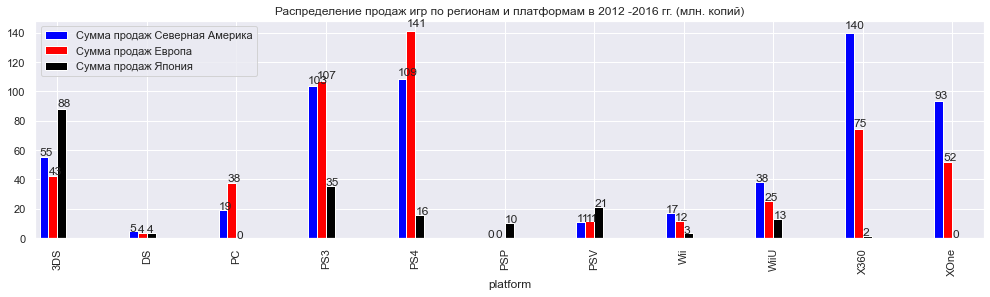

In [68]:
ax=plt.gca()

sales_platform_region.plot(y='na_sales', kind='bar', ax=ax, position=2, color='blue', figsize=(17,4), width=0.1)
sales_platform_region.plot(y='eu_sales', kind='bar', ax=ax, position=1, color='red', figsize=(17,4), width=0.1)
sales_platform_region.plot(y='jp_sales', kind='bar', ax=ax, position=0, color='black', figsize=(17,4), width=0.1)
ax.legend(['Сумма продаж Северная Америка', 'Сумма продаж Европа', 'Сумма продаж Япония'])
plt.title('Распределение продаж игр по регионам и платформам в 2012 -2016 гг. (млн. копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.02))
     
plt.show()

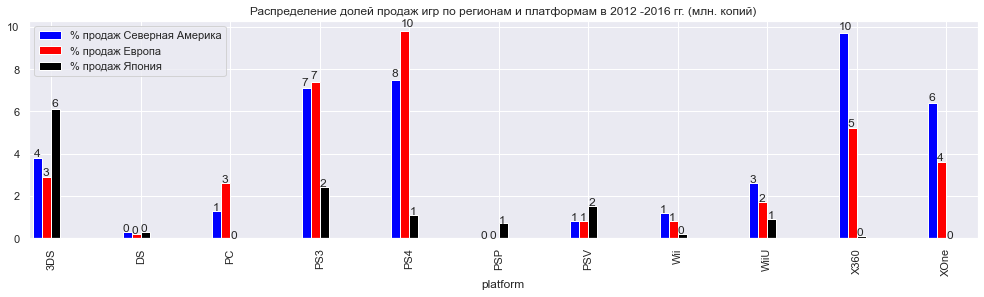

In [69]:
ax=plt.gca()

sales_platform_region.plot(y='%_na_sales', kind='bar', ax=ax, position=2, color='blue', figsize=(17,4), width=0.1)
sales_platform_region.plot(y='%_eu_sales', kind='bar', ax=ax, position=1, color='red', figsize=(17,4), width=0.1)
sales_platform_region.plot(y='%_jp_sales', kind='bar', ax=ax, position=0, color='black', figsize=(17,4), width=0.1)
ax.legend(['% продаж Северная Америка', '% продаж Европа', '% продаж Япония'])
plt.title('Распределение долей продаж игр по регионам и платформам в 2012 -2016 гг. (млн. копий)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.02))
     
plt.show()

In [70]:
print('ТОП 5 платформ по продажам в Северной Америке:')
sales_platform_region.sort_values(by='%_na_sales', ascending=False).head() 

ТОП 5 платформ по продажам в Северной Америке:


,na_sales,eu_sales,jp_sales,%_na_sales,%_eu_sales,%_jp_sales
platform,,,,,,
X360,140.05,74.52,1.57,9.7,5.2,0.1
PS4,108.74,141.09,15.96,7.5,9.8,1.1
PS3,103.38,106.86,35.29,7.1,7.4,2.4
XOne,93.12,51.59,0.34,6.4,3.6,0.0
3DS,55.31,42.64,87.79,3.8,2.9,6.1


In [71]:
print('ТОП 5 платформ по продажам в Европе:')
sales_platform_region.sort_values(by='%_eu_sales', ascending=False).head() 

ТОП 5 платформ по продажам в Европе:


,na_sales,eu_sales,jp_sales,%_na_sales,%_eu_sales,%_jp_sales
platform,,,,,,
PS4,108.74,141.09,15.96,7.5,9.8,1.1
PS3,103.38,106.86,35.29,7.1,7.4,2.4
X360,140.05,74.52,1.57,9.7,5.2,0.1
XOne,93.12,51.59,0.34,6.4,3.6,0.0
3DS,55.31,42.64,87.79,3.8,2.9,6.1


In [72]:
print('ТОП 5 платформ по продажам в Японии:')
sales_platform_region.sort_values(by='%_jp_sales', ascending=False).head() 

ТОП 5 платформ по продажам в Японии:


,na_sales,eu_sales,jp_sales,%_na_sales,%_eu_sales,%_jp_sales
platform,,,,,,
3DS,55.31,42.64,87.79,3.8,2.9,6.1
PS3,103.38,106.86,35.29,7.1,7.4,2.4
PSV,10.98,11.36,21.04,0.8,0.8,1.5
PS4,108.74,141.09,15.96,7.5,9.8,1.1
WiiU,38.10,25.13,13.01,2.6,1.7,0.9


Всего в мире в период 2012 -2016 гг. было продано 1446.5 млн. копий игр.

Лидирующие платформы по количеству продаж игр в Северной Америке:

    1. X360 - 9,7 % (140.05 млн. копий)
    2. PS4 -  7.5 % (108.74 млн. копий)
    3. PS3 -  7.1 % (103.38 млн. копий)
    4. XOne - 6.4 % (93.12  млн. копий)
    5. 3DS -  3.8 % (55.31  млн. копий)
    
    Итого:   34.5 % (501,05 млн. копий)

Лидирующие платформы по количеству продаж в Европе:

    1. PS4 -  9.8 % (141.09 млн. копий)
    2. PS3 -  7.4 % (106.86 млн. копий)
    3. X360 - 5.2 % (74.52 млн. копий)
    4. XOne - 3.6 % (51.59 млн. копий)
    5. 3DS -  2.9 % (42.64 млн. копий)
    
    Итого:   28.9 % (416,9 млн. копий)
    
Лидирующие платформы по количеству продаж в Японии:

    1. 3DS -  6.1 % (87.79 млн. копий)
    2. PS3 -  2.4 % (35.29 млн. копий)
    3. PSV -  1.5 % (21.04 млн. копий)
    4. PS4 -  1.1 % (15.96 млн. копий)
    5. WiiU - 0.9 % (13.01 млн. копий игр)
    
    Итого:     12 % (173,06 млн. копий)
    
В США и Европе предпочитают по большей части одни и те же платформы для игр. Конечно есть различия в предпочтениях, но пятерка лидеров одинакова. Это может говорить о схожести в менталитете пользователей, разделении общих ценностей, ну и конечно о лидерстве одних и тех же корпораций на рынке. Приставки X360 корпорации Microsoft лидируют на американском рынке, правда на европейском рынке американские приставки XOne, X360 корпорации Microsoft не выдерживают конкуренции с японцами PS3, PS4, 3DS (корпорации Sony Computer Entertainment и Nintendo). Следовательно вполне возможно, что у японцев больше развита культура видеоигр.

Япония более малочисленная страна со своим укладом и традициями, поэтому лидеры рынка у них отличаются от Европы и Америки. Тем не менее такие приставки, как PS3, PS4, 3DS  в топе как у Японии, как и в европеоидном мире. По факту получается, что в мире лидируют японские корпорации в области приставок. А также Япония не пропускает чужие корпорации на территорию своей страны, но активно продвигает свои позиции по всему миру.

Интересное наблюдение, какое колоссальное влияние имеют продукты корпорации Microsoft, Sony Computer Entertainment и в меньшей степени Nintendo на пользователей в развитых странах. 75 % современного рынка занимают одни и те же корпорации. Причем 42 % это корпорация Sony Computer Entertainment, а 25 % Microsoft.

#### 4.2 - Самые популярные жанры (топ-5) и разницу между жанрами.

Напишем функцию для построения графиков.

In [73]:
def subplots_pie_plot(data, suptitle, title0, title1, xlabel, ylabel, ylim, legendname):
    ''''
    input:
        data - данные, которые используются
        suptitle - название графика
        title0, title1 - название круговой и столбчатой диаграммы
        xlabel - название оси x столбчатой диаграммы
        ylabel - название оси y столбчатой диаграммы 
        ylim - ограничения по оси y второго графика
        legendname - описание для круговой диаграммы
    '''
    fig, axs = plt.subplots(1, 2, figsize=(22,7))
    plt.suptitle(suptitle, size=23)

#Построение круговой диаграммы
    axs[0].set_title(title0, size = 19)
    axs[0].pie(data.head(5), autopct = '%1.1f%%', labels = data.index.to_list()[0:5])
    axs[0].legend(title = legendname,
          loc = 'center left',
             bbox_to_anchor=(1, 0, 0.5, 1))

#Построение столбчатой диаграммы
    axs[1].set_title(title1, size = 19)
    ax = data.plot(kind='bar', rot=45)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.03))
    axs[1].set_xlabel(xlabel, size=15)
    axs[1].set_ylabel(ylabel, size=15)

    if ylim is not None:
        axs[1].set_ylim(ylim)
   

    plt.show()

Подготовим данные для построения графиков.

In [74]:
plot_na_genre = df_actual.groupby(df_actual['genre'])['na_sales'].sum().sort_values(ascending=False)
plot_eu_genre = df_actual.groupby(df_actual['genre'])['eu_sales'].sum().sort_values(ascending=False)
plot_jp_genre = df_actual.groupby(df_actual['genre'])['jp_sales'].sum().sort_values(ascending=False)

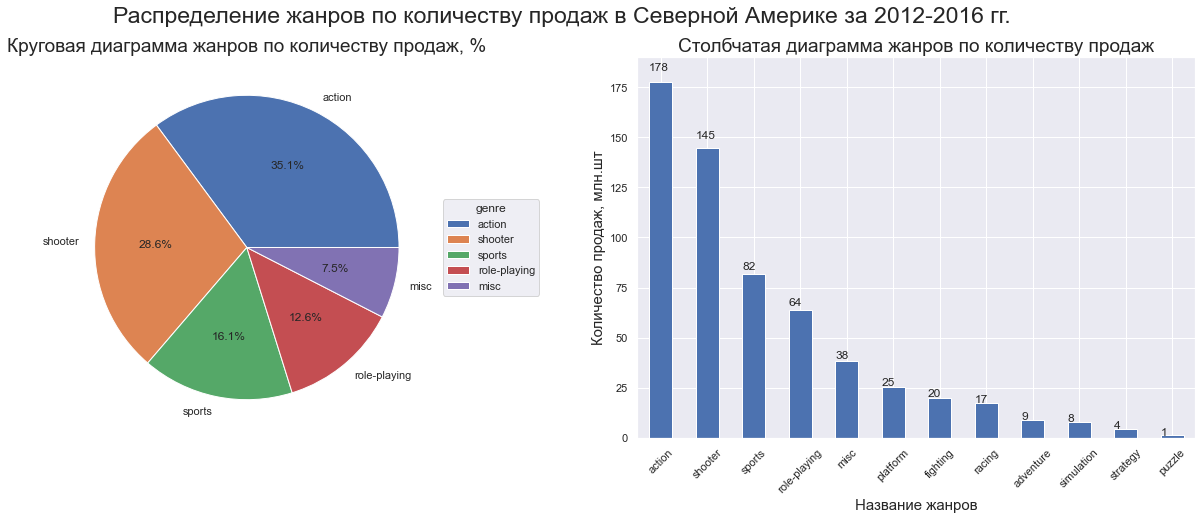

In [75]:
subplots_pie_plot(plot_na_genre, 'Распределение жанров по количеству продаж в Северной Америке за 2012-2016 гг.', \
                  'Круговая диаграмма жанров по количеству продаж, %', 'Столбчатая диаграмма жанров по количеству продаж',\
                  'Название жанров', 'Количество продаж, млн.шт', (None, 190), 'genre')

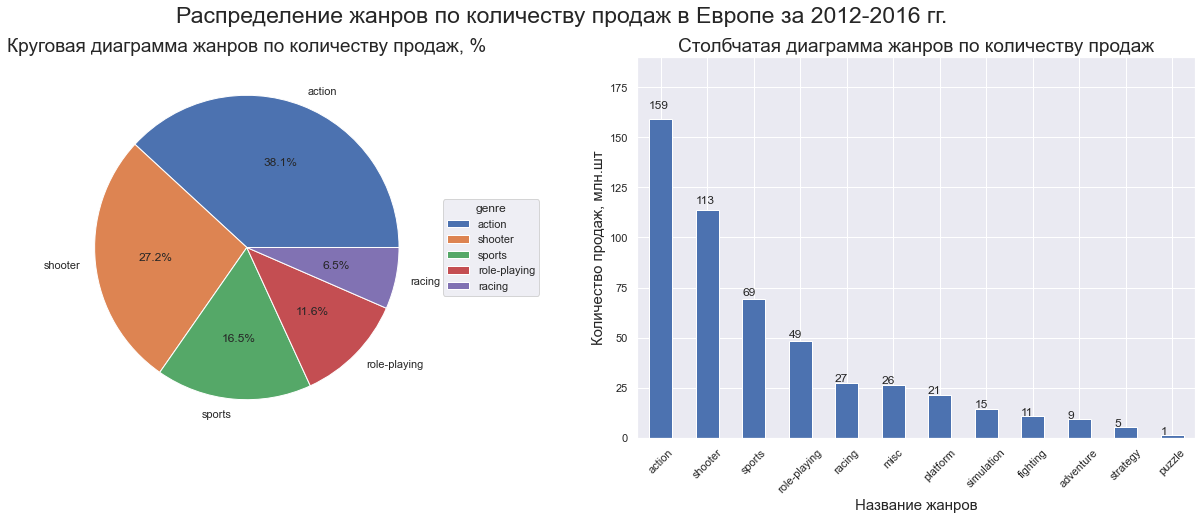

In [76]:
subplots_pie_plot(plot_eu_genre, 'Распределение жанров по количеству продаж в Европе за 2012-2016 гг.', \
                  'Круговая диаграмма жанров по количеству продаж, %', 'Столбчатая диаграмма жанров по количеству продаж',\
                  'Название жанров', 'Количество продаж, млн.шт', (None, 190), 'genre')

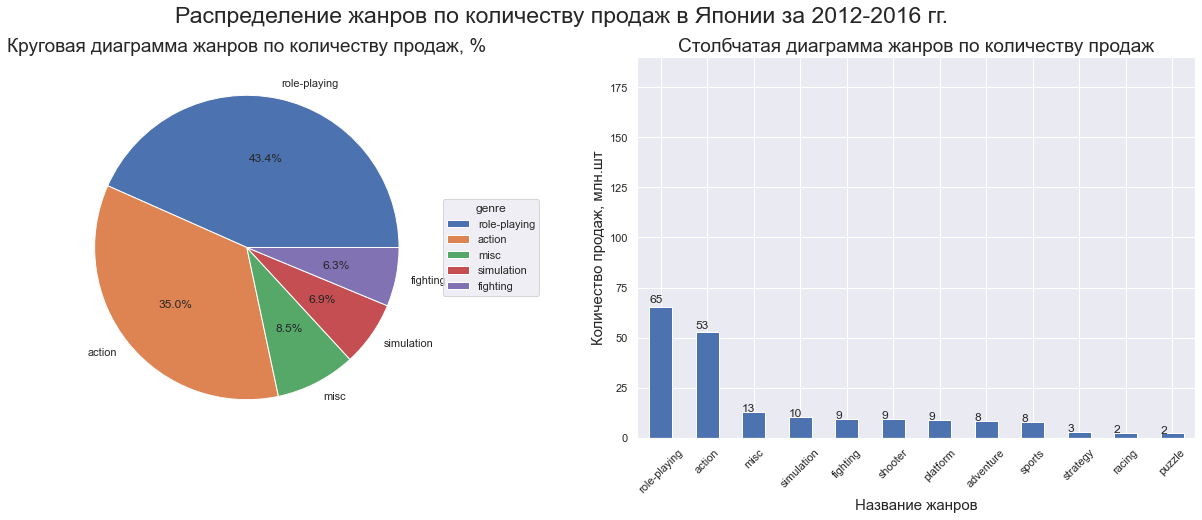

In [77]:
subplots_pie_plot(plot_jp_genre, 'Распределение жанров по количеству продаж в Японии за 2012-2016 гг.', \
                  'Круговая диаграмма жанров по количеству продаж, %', 'Столбчатая диаграмма жанров по количеству продаж',\
                  'Название жанров', 'Количество продаж, млн.шт', (None, 190), 'genre')

Всего в мире в период 2012 -2016 гг. было продано 1446.5 млн. копий игр.

Лидирующие 5 жанров по количеству продаж игр в Северной Америке:

    1. action -       35,1 % (178 млн. копий)
    2. shooter -      28.6 % (145 млн. копий)
    3. sports -       16.1 % (82  млн. копий)
    4. role-playing - 12.6 % (64  млн. копий)
    5. misc -          7.5 % (38  млн. копий)
    
    Итого:                    507 млн. копий

Лидирующие 5 жанров по количеству продаж в Европе:

    1. action -       38,1 % (159 млн. копий)
    2. shooter -      27.2 % (113 млн. копий)
    3. sports -       16.5 % (69  млн. копий)
    4. role-playing - 11.6 % (49  млн. копий)
    5. misc -          6.5 % (27  млн. копий)
    
    Итого:                    417 млн. копий
    
Лидирующие 5 жанров по количеству продаж в Японии:

    1. role-playing - 43,4 % (65 млн. копий)
    2. action -       35,0 % (53 млн. копий)
    3. misc -          8.5 % (13 млн. копий)
    4. simulation -    6.9 % (10 млн. копий)
    5. fighting -      6.3 % (9  млн. копий )
    
    Итого:                   150 млн. копий

- Если отбросить количественные показатели и посмотреть на доли пользователей, то сразу наблюдаем идентичные вкусы в Европе и Северной Америке.
- Более того, даже помимо одинаковых жанровых предпочтений наблюдаются и одинаковые процентные соотношения предпочтений по жанрам.
- Это значит, что пользователи в Европе и Америке содержат в себе один культурный код и подвержены одному и тому же влиянию схожих традиций. Ведь не смотря на преобладание платформ японских корпораций пользователи предпочитают одни и те же игры.
- action и shooter, sports занимают подавляющую долю предпочтений западного мира.
- Как было подмечено ранее, пользователи из Японии имеют свои традиции, предпочитают ролевые игры и экшн в большинстве.
- Cовпадения в предпочтениях по трем регионам наблюдается в жанрах misc (смешанный жанр) и action.
- жанр action оказался самым приспособленным как по продажам, так и по предпочтениям в разных регионах. Неудивительно, что количество выпущенных игр в этом жанре преобладает.

#### 4.3 - Влияние рейтинга ESRB на продажи в отдельном регионе.

In [78]:
sales_rating_region = (df_actual
                  .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]   # группируем по жанрам;
                  .agg('sum')                                                # сумма по продажам в регионах для разных жанров;
                 )                                                          
sales_rating_region

,na_sales,eu_sales,jp_sales
rating,,,
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02


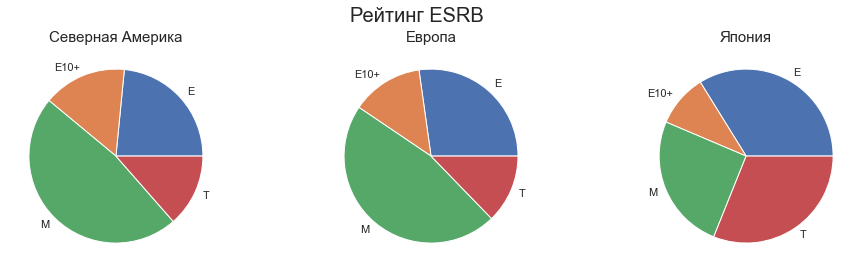

In [79]:
# Визуализируем портреты пользователей по рейтингу ESRB с помощью pie.
fig = plt.figure(figsize=(16,4))
fig.suptitle('Рейтинг ESRB', fontsize=20, y=1.02)
ax1 = plt.subplot(131)
# построим quantile-quantile plots методом probplot() из библиотеки stats для обеих выборок
plt.pie(sales_rating_region['na_sales'], labels=sales_rating_region.index)
ax1.set_title('Северная Америка', fontsize=15)

ax2 = plt.subplot(132)
plt.pie(sales_rating_region['eu_sales'], labels=sales_rating_region.index)
ax2.set_title('Европа', fontsize=15)

ax3 = plt.subplot(133)
plt.pie(sales_rating_region['jp_sales'], labels=sales_rating_region.index)
ax3.set_title('Япония', fontsize=15)

plt.show()

In [80]:
# посчитаем доли от мировых продаж по регионам в актуальный период
sales_rating_region['%_na_sales'] = ((sales_rating_region['na_sales'] / df_actual['sum_sales'].sum())*100).round(1)
sales_rating_region['%_eu_sales'] = ((sales_rating_region['eu_sales'] / df_actual['sum_sales'].sum())*100).round(1)
sales_rating_region['%_jp_sales'] = ((sales_rating_region['jp_sales'] / df_actual['sum_sales'].sum())*100).round(1)

print('Сводная таблица продаж по платформам и регионам в 2012 -2016 гг. (млн. копий, доли продаж)')
sales_rating_region

Сводная таблица продаж по платформам и регионам в 2012 -2016 гг. (млн. копий, доли продаж)


,na_sales,eu_sales,jp_sales,%_na_sales,%_eu_sales,%_jp_sales
rating,,,,,,
E,114.37,113.03,28.33,7.9,7.8,2.0
E10+,75.70,55.37,8.19,5.2,3.8,0.6
M,231.57,193.96,21.20,16.0,13.4,1.5
T,66.02,52.96,26.02,4.6,3.7,1.8


In [81]:
plot_na_rating = df_actual.groupby(df_actual['rating'])['na_sales'].sum().sort_values(ascending=False)
plot_eu_rating = df_actual.groupby(df_actual['rating'])['eu_sales'].sum().sort_values(ascending=False)
plot_jp_rating = df_actual.groupby(df_actual['rating'])['jp_sales'].sum().sort_values(ascending=False)

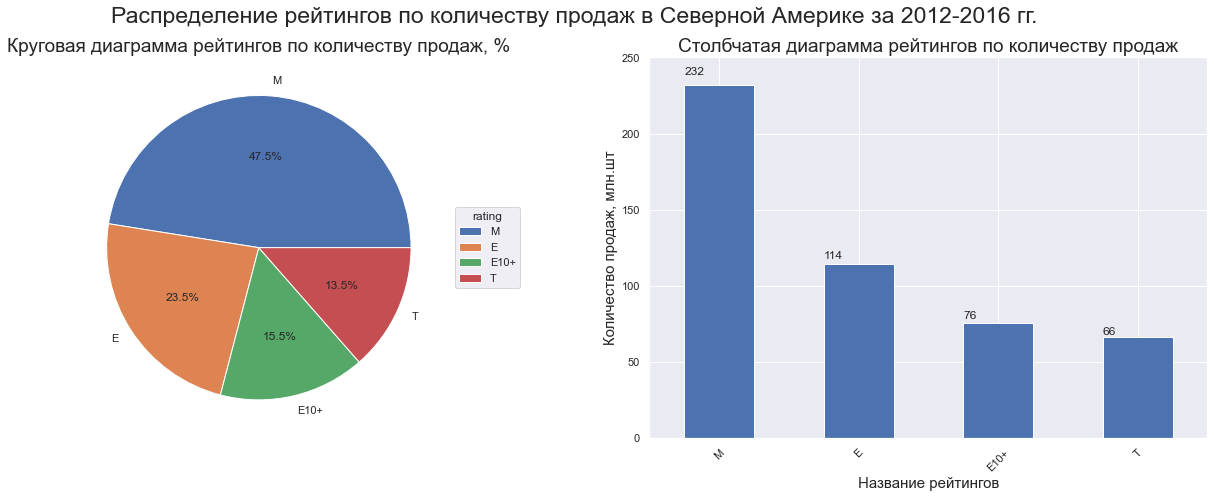

In [82]:
subplots_pie_plot(plot_na_rating, 'Распределение рейтингов по количеству продаж в Северной Америке за 2012-2016 гг.', \
                  'Круговая диаграмма рейтингов по количеству продаж, %', 'Столбчатая диаграмма рейтингов по количеству продаж',\
                  'Название рейтингов', 'Количество продаж, млн.шт', (None, 250), 'rating')

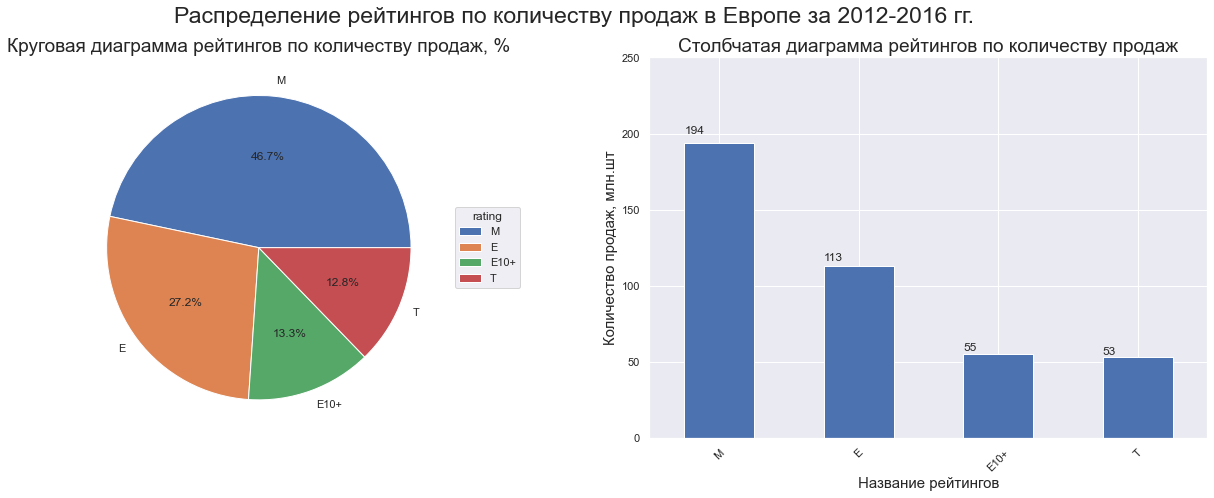

In [83]:
subplots_pie_plot(plot_eu_rating, 'Распределение рейтингов по количеству продаж в Европе за 2012-2016 гг.', \
                  'Круговая диаграмма рейтингов по количеству продаж, %', 'Столбчатая диаграмма рейтингов по количеству продаж',\
                  'Название рейтингов', 'Количество продаж, млн.шт', (None, 250), 'rating')

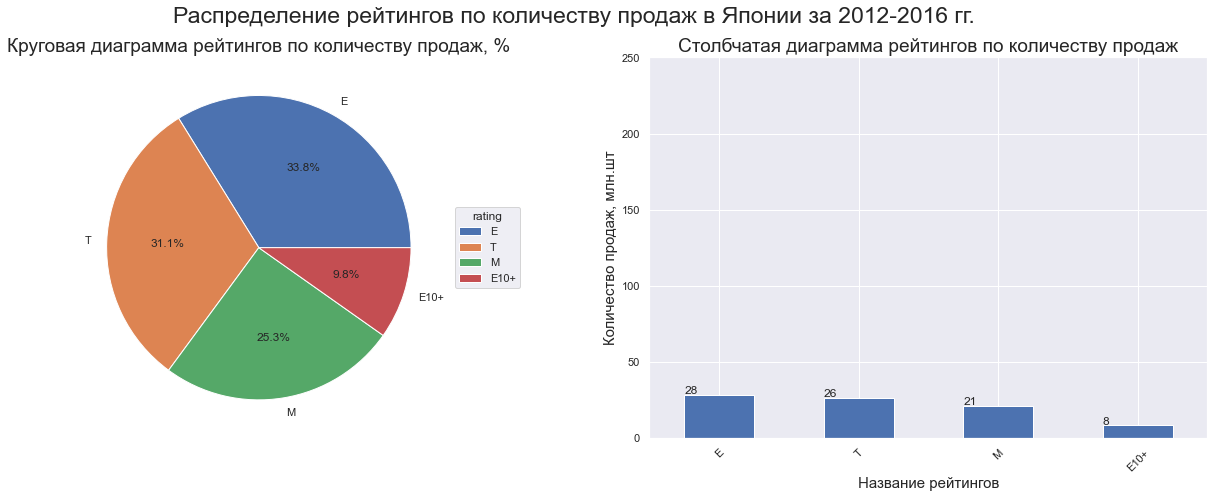

In [84]:
subplots_pie_plot(plot_jp_rating, 'Распределение рейтингов по количеству продаж в Японии за 2012-2016 гг.', \
                  'Круговая диаграмма рейтингов по количеству продаж, %', 'Столбчатая диаграмма рейтингов по количеству продаж',\
                  'Название рейтингов', 'Количество продаж, млн.шт', (None, 250), 'rating')

Всего в мире в период 2012 -2016 гг. было продано 1446.5 млн. копий игр.

**рейтинги  ESRB (Entertainment Software Rating Board)**

- **E (Everyone)** - для всех возрастов
- **T (Teen)** - для подростков (13-19 лет)
- **M (Mature)** - для всех старше 17 лет
- **E10+ (Everyone 10+)** - для всех, кроме самых маленьких (не младше 10 лет)

Лидирующие рейтинги по количеству продаж игр в Северной Америке:

    1. М -       47,5 % (232 млн. копий)
    2. E -       23.5 % (114 млн. копий)
    3. E10+ -    15.5 % (76  млн. копий)
    4. T -       13.5 % (66  млн. копий)
    
    Итого:               488 млн. копий

Лидирующие рейтинги по количеству продаж игр в Европе:

    1. М -       46,7 % (194 млн. копий)
    2. E -       27.2 % (113 млн. копий)
    3. E10+ -    13.3 % (55  млн. копий)
    4. T -       12.8 % (53  млн. копий)
    
    Итого:               415 млн. копий
    
Лидирующие рейтинги по количеству продаж игр в Японии:

    1. E -       33,8 % (28 млн. копий)
    2. T -       31.1 % (26 млн. копий)
    3. M -       25.3 % (21 млн. копий)
    4. E10+ -     9.8 % (8  млн. копий)
    
    Итого:               83 млн. копий
    
- Судя по всему по данным в Японии большое количество игр не имеет информации по рейтингу(не менее половины игр, тк продаж по платформам 173 млн копий). Ответ на вопрос почему так много пропусков может крыться в Японии. Возможно они не поддаются рейтингам американской организации, ранее и по другим пунктам мы наблюдали проявления самодостаточности Японии.
- Опять же наблюдаем схожесть, если не полное копирование в рейтинговых оценках по Европе и Северной Америке. В данным регионах лидирует рейтинг **M (Mature)** - для всех старше 17 лет, занимая почти половину исследованного рынка и рейтинг E, занимая около четверти рынка. С учетом того, что у нас имеются пропуски в рейтинге, но уже не многочисленные, как в Японии. 
- По всей видимости  ESRB (Entertainment Software Rating Board) очень хорошо работает в Европе, поскольку пропусков по данным этого региона почти нет - 416млн продаж по платформам против информации 415 млн. копий продаж по рейтингам.  
- В Северной Америке ситуация чуть хуже в плане пропусков данных по рейтингам, но из 501 млн продаж по платформам 488 млн имеют оцененный рейтинг.
- Таким образом мы имеет очень точную информацию по Европе и в целом можем полагаться на эти данные более остальных, при дополнительных исследованиях, если они понадобятся.
- В целом можно сказать, что преимущественно производители игр стараются создавать игры для взрослых, поскольку именно взрослые - это самая платежеспособная аудитория.

### 5. Проверка гипотез

Задайте самостоятельно пороговое значение alpha.
Поясните:

    Как вы сформулировали нулевую и альтернативную гипотезы;
    Какой критерий применили для проверки гипотез и почему.

Проверим гипотезы:

**1) О равенстве средних пользовательских рейтингов платформ Xbox One и PC:**

     - Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC равны
     
     - Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются (не равны)
    
**2) О равенстве средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).**

     - Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны
          
     - Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются (не равны).

#### 5.1 О равенстве средних пользовательских рейтингов платформ Xbox One и PC

Подготовим датасеты без пропусков по выборкам для проверки гипотезы. Рассматривать будем актуальный период 2012 - 2016.  

In [85]:
xone = df_actual.query('platform == "XOne"').dropna()
pc = df_actual.query('platform == "PC"').dropna()

print('Количество строк в xone:', xone.shape[0])
print('Количество строк в pc:', pc.shape[0])

Количество строк в xone: 159
Количество строк в pc: 174


In [86]:
#Посчитаем средний рейтинг пользователя для Xone и pc

print('Средний рейтинг пользователя Xbox(Xone): ', xone['user_score'].mean())
print('Средний рейтинг пользователя PC: ', pc['user_score'].mean())
print('Разница средних рейтингов Xbox(Xone) и PC: ', xone['user_score'].mean()-pc['user_score'].mean())

Средний рейтинг пользователя Xbox(Xone):  6.493081761006291
Средний рейтинг пользователя PC:  6.358045977011488
Разница средних рейтингов Xbox(Xone) и PC:  0.13503578399480265


Для применения критерия Стьюдента выборки должны иметь нормальные распределения, а их дисперсии не должны сильно отличаться.

Проверим распределения.

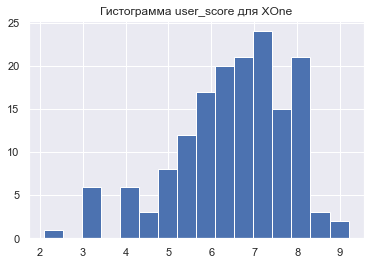

In [87]:
xone['user_score'].hist(bins=16)
plt.title('Гистограмма user_score для XOne')                  
plt.show()

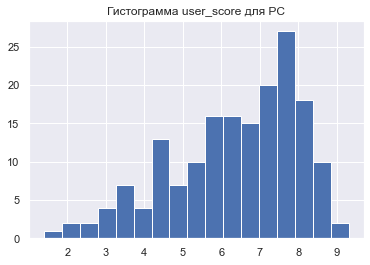

In [88]:
pc['user_score'].hist(bins=17)
plt.title('Гистограмма user_score для PC')                  
plt.show()

Гистограммы скошены вправо. Распределения не являются нормальными, но при большом количестве значений стремятся к нормальному.

Для проверки гипотезы о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам применим тест Стьюдента:

In [89]:
alpha = .01 # уровень значимости

result = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)

print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение =  0.41668656393474524
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза оказалась верна. В рассматриваемый период 2012-2016 с заданным уровнем значимости alpha=0.01 средние пользовательские рейтинги платформ Xbox One и PC равны.

#### 5.2 О равенстве средних пользовательских рейтингов жанров Action и Sports

Подготовим датасеты без пропусков по выборкам для проверки гипотезы. Рассматривать будем актуальный период 2012 - 2016.

In [90]:
action = df_actual.query('genre == "action"').dropna()
sports = df_actual.query('genre == "sports"').dropna()

print('Количество строк в action:', action.shape[0])
print('Количество строк в sports:', sports.shape[0])

Количество строк в action: 422
Количество строк в sports: 136


In [91]:
# посчитаем средний рейтинг обычных пользователей жанров для action и sports

print('Средний рейтинг пользователей жанра action: ', action['user_score'].mean())
print('Средний рейтинг пользователей жанра sports: ', sports['user_score'].mean())
print('Разница средних рейтингов пользователей жанра action и sports: ', action['user_score'].mean()-sports['user_score'].mean())

Средний рейтинг пользователей жанра action:  6.874881516587685
Средний рейтинг пользователей жанра sports:  5.8161764705882355
Разница средних рейтингов пользователей жанра action и sports:  1.0587050459994494


Для применения критерия Стьюдента выборки должны иметь нормальные распределения, а их дисперсии не должны сильно отличаться.

Проверим распределения.

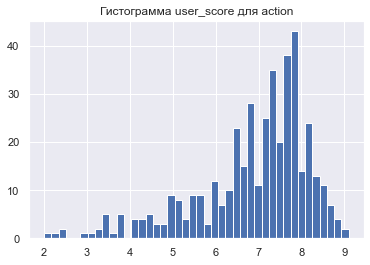

In [92]:
action['user_score'].hist(bins=42)
plt.title('Гистограмма user_score для action')                  
plt.show()

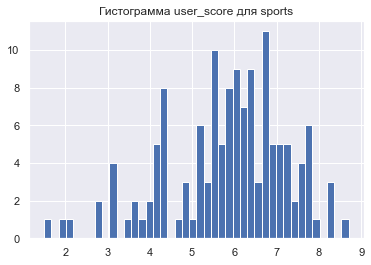

In [93]:
sports['user_score'].hist(bins=42)
plt.title('Гистограмма user_score для sports')                  
plt.show()

In [94]:
alpha = .05 # уровень значимости

result = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение =  4.778145125344677e-13
Отвергаем нулевую гипотезу


Альтернативная гипотеза H₁ подтверждена. В рассматриваемый период 2012-2016 с заданным уровнем значимости alpha=0.05 средние пользовательские рейтинги жанров action и sports различаются.

#### 6. Общий вывод

Исходя из результатов исследования рынок игровых приставок в последние годы утрачивает свою актуальность, продажи падают, пользователей уже сложно удивить, поскольку все возможные жанры уже придуманы, основные идеи переосмыслены и неоднократно перевыпущены, также уменьшилось количество выпускаемых игр, пик продаж приходился на 2008 -2010 годы. Тем не менее все равно останутся самые преданные фанаты игр, которые следят за обновлениями и именно на этих пользователей стоит делать ставку при планировании стратегии развития. 
С течением развитием времени у человечества остается все меньше свободного времени, особенно в мегаполисах, время становится ценным ресурсом и для удержания внимания пользователей остается одна надежда на маркетинг. У главных корпораций, которые остались на рынке такой ресурс, как бюджет на маркетинг имеется, следовательно можно ожидать в 2017 году продолжение конкурентной борьбы за основную массу пользователей приставок из Японии компании Sony и американских Microsoft.

Исходя из результатов исследования самыми популярными приставками и платформами на 2017 год должны стать PS4, 3DS, XOne, WiiU, PC. PS4 при этом уверенно лидирует в странах Европы и Северной Америке, при это довольствуясь относительно скромными успехами у себя на родине в Японии. Платформа 3DS лидер по продажам в Японии, в котором в целом более многообразный рынок, чем в остальном мире.

Также выявлено, что предпочтения покупателей из Европы и Северной Америки почти не отличаются как по предпочитаемым приставкам (PS4, PS3, X360, XOne, 3DS), влиянию рейтингов на покупки жанровым предпочтениям. Сказывается схожесть в менталитете. Глобализация делает свое дело. А Япония все же носит на себе отпечаток предыдущей изоляции и самодостаточности. Они по возможности не пускают на свои рынки конкурентов, зато активно продвигают свою продукцию по всему миру. Более 50 процентов продуктов на рынке игр имеют происхождении из Японии. 

Что можно сказать по жанрам, то action, shooter и в меньшей степени sports занимают подавляющую долю предпочтений Европы и Америки. Пользователи из Японии имеют свои традиции, предпочитают ролевые игры и экшн в большинстве. Cовпадения в предпочтениях по трем регионам наблюдается в жанрах misc (смешанный жанр) и action.

В разделе исследовательский анализ данных выявлены актуальные игровые платформы в период релиза игр с 2012 - 2016.

        1. 'PS4' - 314 млн. копий
        2. '3DS' - 194 млн. копий
        3. 'XOne'- 159 млн. копий
        4. 'WiiU'- 82  млн. копий
        5. 'PC'  - 62  млн. копий
        
Из топ 5 исключены PS3 и X360, поскольку данные платформы заменены платформами следующего поколения - PS4 и XOne, соответственно новые игры на эти платформы уже не выходят. Период популярности игровых платформ длится от 5 до 10 лет,  актуальные платформы существуют уже в среднем около 3 лет и следовательно у выбранных платформ еще есть около 2х лет в запасе.

**Портрет пользователя каждого региона**

Всего в мире в период 2012 -2016 гг. было продано 1446.5 млн. копий игр, большая доля которых находится в Северной Америке(7 % населения планеты - 34.5% продаж), Европе(9 % населения планеты - 28.9 % продаж) и Японии (1,6% населения планеты - 12 % продаж). При этом занимательно, что не смотря на меньшую долю продаж относительно стран Запада у Японии с населением 1,6% земного шара 12 % мировых продаж, то есть это очень самый высокий уровень продаж на душу населения.
___________________________________________________________________
**Лидирующие платформы по количеству продаж игр:**

**Северная Америка:**

1. X360 - 9,7 % (140.05 млн. копий)
2. PS4 -  7.5 % (108.74 млн. копий)
3. PS3 -  7.1 % (103.38 млн. копий)
4. XOne - 6.4 % (93.12  млн. копий)
5. 3DS -  3.8 % (55.31  млн. копий)

Итого:   34.5 % (501,05 млн. копий)

**Европа:**

1. PS4 -  9.8 % (141.09 млн. копий)
2. PS3 -  7.4 % (106.86 млн. копий)
3. X360 - 5.2 % (74.52 млн. копий)
4. XOne - 3.6 % (51.59 млн. копий)
5. 3DS -  2.9 % (42.64 млн. копий)

Итого:   28.9 % (416,9 млн. копий)

**Япония:**

1. 3DS -  6.1 % (87.79 млн. копий)
2. PS3 -  2.4 % (35.29 млн. копий)
3. PSV -  1.5 % (21.04 млн. копий)
4. PS4 -  1.1 % (15.96 млн. копий)
5. WiiU - 0.9 % (13.01 млн. копий игр)

Итого:     12 % (173,06 млн. копий)

___________________________________________________________________

**Лидирующие 5 жанров по количеству продаж игр:** 

**Северная Америка:**

1. action -       35,1 % (178 млн. копий)
2. shooter -      28.6 % (145 млн. копий)
3. sports -       16.1 % (82  млн. копий)
4. role-playing - 12.6 % (64  млн. копий)
5. misc -          7.5 % (38  млн. копий)

Итого:                    507 млн. копий

**Европа:**

1. action -       38,1 % (159 млн. копий)
2. shooter -      27.2 % (113 млн. копий)
3. sports -       16.5 % (69  млн. копий)
4. role-playing - 11.6 % (49  млн. копий)
5. misc -          6.5 % (27  млн. копий)

Итого:                    417 млн. копий

**Япония:**

1. role-playing - 43,4 % (65 млн. копий)
2. action -       35,0 % (53 млн. копий)
3. misc -          8.5 % (13 млн. копий)
4. simulation -    6.9 % (10 млн. копий)
5. fighting -      6.3 % (9  млн. копий )

Итого:                   150 млн. копий

**Лидирующие рейтинги ESRB по количеству продаж игр:**

**Северная Америка:**

1. М -       47,5 % (232 млн. копий)
2. E -       23.5 % (114 млн. копий)
3. E10+ -    15.5 % (76  млн. копий)
4. T -       13.5 % (66  млн. копий)

Итого:               488 млн. копий

**Европа:**

1. М -       46,7 % (194 млн. копий)
2. E -       27.2 % (113 млн. копий)
3. E10+ -    13.3 % (55  млн. копий)
4. T -       12.8 % (53  млн. копий)

Итого:               415 млн. копий

**Япония:**

1. E -       33,8 % (28 млн. копий)
2. T -       31.1 % (26 млн. копий)
3. M -       25.3 % (21 млн. копий)
4. E10+ -     9.8 % (8  млн. копий)

Итого:               83 млн. копий


Проверены статистические гипотезы о равенстве пользовательских оценок на игровых платформах Xbox One и PC, а также среди жанров Action и Sports. 

    1. В рассматриваемый период 2012-2016 средние пользовательские рейтинги платформ Xbox One и PC равны.

    2. В рассматриваемый период 2012-2016 средние пользовательские рейтинги жанров action и sports различаются.

In [1]:
import numpy as np
 
def convolve(sequence, weights):
    convolution = np.zeros(len(sequence) - len(weights) + 1)
    for i in range(convolution.shape[0]):
        convolution[i] = np.sum(weights * sequence[i:i + len(weights)])
    return convolution
 
s = np.array([3, 10, 12, 15, 20])
w = np.array([-1, 2])
 
print(convolve(s, w))

[17. 14. 18. 25.]


In [4]:
import numpy as np
 
def convolve(sequence, weights):
    convolution = np.zeros(len(sequence) - len(weights) + 1)
    for i in range(convolution.shape[0]):
        convolution[i] = np.sum(weights * sequence[i:i + len(weights)])
    return convolution
 
s = np.array([2, 3, 5, 7, 11])
w = np.array([-1, 1]) 
 
print(convolve(s, w))

[1. 2. 2. 4.]
